In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz" #tgz = tar ball (just like zip file)
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)
data_dir

228827136/228813984 [==============================] - 2s 0us/step


PosixPath('/root/.keras/datasets/flower_photos')

In [ ]:
os.listdir('/root/.keras/datasets/flower_photos')

['tulips', 'roses', 'daisy', 'LICENSE.txt', 'sunflowers', 'dandelion']

In [ ]:
os.listdir('/root/.keras/datasets/flower_photos/roses')

['8337607102_d9e0fa887e.jpg',
 '9298314004_c1a8146521.jpg',
 '8063462557_e0a8bd6c64_n.jpg',
 '5083072098_81587295d5.jpg',
 '3231873181_faf2da6382.jpg',
 '8692051081_dffa8709e7_m.jpg',
 '7285188160_49d84b95a3_m.jpg',
 '2713683760_d98cd2a05b_m.jpg',
 '5249439791_196b4e7fc7.jpg',
 '12243068283_ee4c2683e2_n.jpg',
 '921984328_a60076f070_m.jpg',
 '2300959680_8d22fa5ee2.jpg',
 '3103591125_99107c8bbe_n.jpg',
 '15061894841_e5aca59ecd_n.jpg',
 '8516036987_8a06dfe1b5_n.jpg',
 '15951588433_c0713cbfc6_m.jpg',
 '14172324538_2147808483_n.jpg',
 '6653567281_768a1fd160.jpg',
 '11694025703_9a906fedc1_n.jpg',
 '7376471712_e1be793f94.jpg',
 '6936225976_a91b60d8c2_m.jpg',
 '4279990882_031482f8b6_n.jpg',
 '160954292_6c2b4fda65_n.jpg',
 '22982871191_ec61e36939_n.jpg',
 '1540738662_7b4152e344_m.jpg',
 '3621011057_0d03bd171b_n.jpg',
 '14687731322_5613f76353.jpg',
 '4860145119_b1c3cbaa4e_n.jpg',
 '5863698305_04a4277401_n.jpg',
 '5487945052_bcb8e9fc8b_m.jpg',
 '5398974188_799753449c.jpg',
 '17040847367_b54d05bf5

In [ ]:
len(os.listdir('/root/.keras/datasets/flower_photos/roses'))

641

In [ ]:
len(os.listdir('/root/.keras/datasets/flower_photos/tulips'))

799

In [ ]:
len(os.listdir('/root/.keras/datasets/flower_photos/sunflowers'))

699

In [ ]:
len(os.listdir('/root/.keras/datasets/flower_photos/dandelion'))

898

In [ ]:
len(os.listdir('/root/.keras/datasets/flower_photos/daisy'))

633

In [ ]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from glob import glob



In [ ]:
list(data_dir.glob('roses/*.jpg'))

[PosixPath('/root/.keras/datasets/flower_photos/roses/8337607102_d9e0fa887e.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/9298314004_c1a8146521.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/8063462557_e0a8bd6c64_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/5083072098_81587295d5.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/3231873181_faf2da6382.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/8692051081_dffa8709e7_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/7285188160_49d84b95a3_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/2713683760_d98cd2a05b_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/5249439791_196b4e7fc7.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/12243068283_ee4c2683e2_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/921984328_a60076f070_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/2300959680_8d22fa5ee2

In [ ]:
image_count = len(list(data_dir.glob('roses/*.jpg')))
print(image_count)

641


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses = list(data_dir.glob('roses/*'))

In [ ]:
roses

[PosixPath('/root/.keras/datasets/flower_photos/roses/8337607102_d9e0fa887e.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/9298314004_c1a8146521.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/8063462557_e0a8bd6c64_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/5083072098_81587295d5.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/3231873181_faf2da6382.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/8692051081_dffa8709e7_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/7285188160_49d84b95a3_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/2713683760_d98cd2a05b_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/5249439791_196b4e7fc7.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/12243068283_ee4c2683e2_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/921984328_a60076f070_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/2300959680_8d22fa5ee2

In [ ]:
type(roses)

list

In [ ]:
roses[2]

PosixPath('/root/.keras/datasets/flower_photos/roses/8063462557_e0a8bd6c64_n.jpg')

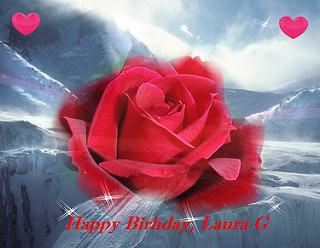

In [ ]:
PIL.Image.open(str(roses[2]))

In [ ]:
tulips = list(data_dir.glob('tulips/*'))

In [ ]:
tulips

[PosixPath('/root/.keras/datasets/flower_photos/tulips/7070694881_e9a331fa4e_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/tulips/4555842486_dd214a84d7_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/tulips/303858799_942b9c09e7_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/tulips/7166570828_7c26ca5766_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/tulips/13997641965_80d5dab542_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/tulips/8619064872_dea79a9eb9.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/tulips/8713391394_4b679ea1e3_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/tulips/3501996215_1c6d1a3386_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/tulips/7447655334_e8f805ab95_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/tulips/13910126337_53faf1d214_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/tulips/17146928665_600fa3a1f1_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/tulips

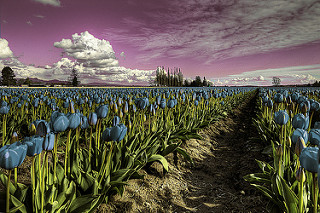

In [ ]:
PIL.Image.open(str(tulips[145]))

In [ ]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img
for fname in os.listdir('/root/.keras/datasets/flower_photos/tulips'):
  print(fname)

7070694881_e9a331fa4e_n.jpg
4555842486_dd214a84d7_n.jpg
303858799_942b9c09e7_m.jpg
7166570828_7c26ca5766_n.jpg
13997641965_80d5dab542_n.jpg
8619064872_dea79a9eb9.jpg
8713391394_4b679ea1e3_n.jpg
3501996215_1c6d1a3386_n.jpg
7447655334_e8f805ab95_m.jpg
13910126337_53faf1d214_n.jpg
17146928665_600fa3a1f1_n.jpg
8892851067_79242a7362_n.jpg
14097366955_84ef6369f2.jpg
3282751630_45c2665034_m.jpg
13513644515_a51470b899.jpg
13923539227_bdab038dc8.jpg
5700466891_2bcb17fa68_n.jpg
2087981909_fd468de5c4_n.jpg
13910719110_1b21d1fc81.jpg
8603340662_0779bd87fd.jpg
8708856019_f3be2353a4_n.jpg
8762193202_0fbf2f6a81.jpg
4395433872_e073d8c721_n.jpg
2280950463_86510c2789_n.jpg
12916441224_2ed63596f8_n.jpg
8713357842_9964a93473_n.jpg
13561908485_7e4f8d508b.jpg
3511104954_54eace015c_n.jpg
4644110077_ff252cd7c4.jpg
13510068773_c925c5517c.jpg
13542672763_20c3cb9272.jpg
7042692841_f323799c0d.jpg
497305666_b5d4348826_n.jpg
4599815420_8ee42c2382.jpg
15976769174_1d50f46ca1_m.jpg
5524946579_307dc74476.jpg
1254857492

In [ ]:
img_1=('/root/.keras/datasets/flower_photos/tulips/467702445_b8676f60fb_n.jpg')

In [ ]:
img_1

'/root/.keras/datasets/flower_photos/tulips/467702445_b8676f60fb_n.jpg'

In [ ]:
batch_size = 64
epochs = 25
IMG_HIGHT=224
IMG_WIDHT=224

In [ ]:
image_gen_train = ImageDataGenerator(rescale = 1./255,
                                     rotation_range=45,
                                     width_shift_range=.15,
                                     height_shift_range=.15,
                                     horizontal_flip=0.5,
                                     zoom_range=0.5,
                                     validation_split=0.2)

In [ ]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=data_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HIGHT,IMG_WIDHT),
                                                     subset='training')

Found 2939 images belonging to 5 classes.


In [ ]:
train_data_gen.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)

In [ ]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=data_dir,
                                                 target_size=(IMG_HIGHT,IMG_WIDHT),
                                                 subset='validation')

Found 731 images belonging to 5 classes.


In [ ]:
sample_img,label=next(train_data_gen)

In [ ]:
sample_img.shape

(64, 224, 224, 3)

In [ ]:
label

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0.

In [ ]:
from keras.layers import Conv2D,MaxPooling2D,Dropout

model = Sequential([
                    Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_HIGHT,IMG_WIDHT,3)),
                    MaxPooling2D(),
                    Dropout(0.2),
                    Conv2D(32,3,padding='same',activation='relu'),
                    MaxPooling2D(),
                    Dropout(0.2),
                    Conv2D(64,3,padding='same',activation='relu'),
                    MaxPooling2D(),
                    Dropout(0.2),
                    Flatten(),
                    Dense(512,activation='relu'),
                    Dense(256,activation='relu'),
                    Dense(5,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 56, 56, 32)        0

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_data_gen,validation_data= val_data_gen,epochs=epochs,verbose=1)

Epoch 1/25
46/46 [==============================] - 54s 953ms/step - loss: 1.8846 - accuracy: 0.2239 - val_loss: 1.6027 - val_accuracy: 0.2298
Epoch 2/25
46/46 [==============================] - 44s 951ms/step - loss: 1.4448 - accuracy: 0.3596 - val_loss: 1.3962 - val_accuracy: 0.4391
Epoch 3/25
46/46 [==============================] - 43s 943ms/step - loss: 1.3229 - accuracy: 0.4396 - val_loss: 1.2597 - val_accuracy: 0.5280
Epoch 4/25
46/46 [==============================] - 43s 928ms/step - loss: 1.1761 - accuracy: 0.5277 - val_loss: 1.2364 - val_accuracy: 0.5280
Epoch 5/25
46/46 [==============================] - 43s 928ms/step - loss: 1.1240 - accuracy: 0.5413 - val_loss: 1.1000 - val_accuracy: 0.5814
Epoch 6/25
46/46 [==============================] - 42s 916ms/step - loss: 1.0696 - accuracy: 0.5733 - val_loss: 1.0550 - val_accuracy: 0.5978
Epoch 7/25
46/46 [==============================] - 42s 914ms/step - loss: 1.0235 - accuracy: 0.5907 - val_loss: 1.0674 - val_accuracy: 0.5882

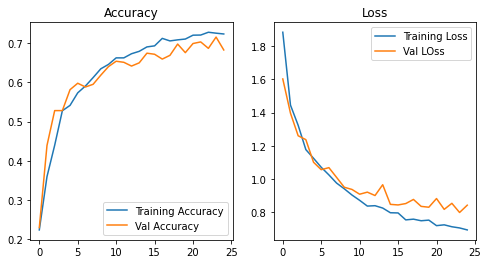

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Val LOss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

In [ ]:
# for daving model

In [ ]:
tf.keras.models.save_model(model,'flowermodel.h5')

In [ ]:
image_1 = load_img('/root/.keras/datasets/flower_photos/roses/1402130395_0b89d76029.jpg',target_size=(IMG_HIGHT,IMG_WIDHT))

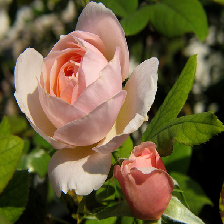

In [ ]:
image_1

In [ ]:
image_1=img_to_array(image_1)

In [ ]:
image_1.shape

(224, 224, 3)

In [ ]:
image_1= image_1.reshape(1,224,224,3)

In [ ]:
image_1.shape

(1, 224, 224, 3)

In [ ]:
model.predict(image_1)

array([[0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
np.argmax(model.predict(image_1))

4

In [ ]:
#load Model
from keras.preprocessing.image import array_to_img, img_to_array, load_img
import tensorflow as tf

In [ ]:
model = tf.keras.models.load_model('flowermodel.h5')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 56, 56, 32)        0

In [ ]:
data_1 = load_img('/root/.keras/datasets/flower_photos/tulips/5208680166_c4372477ef_n.jpg',target_size=(IMG_HIGHT,IMG_WIDHT))

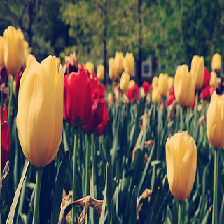

In [ ]:
data_1

In [ ]:
data_1 = img_to_array(data_1)

In [ ]:
data_1

array([[[ 46.,  59.,  68.],
        [ 35.,  48.,  65.],
        [ 42.,  53.,  71.],
        ...,
        [ 56.,  76.,  64.],
        [ 56.,  76.,  65.],
        [ 57.,  81.,  55.]],

       [[ 59.,  68.,  75.],
        [ 40.,  52.,  66.],
        [ 47.,  56.,  71.],
        ...,
        [ 65.,  83.,  71.],
        [ 58.,  78.,  67.],
        [ 54.,  79.,  58.]],

       [[ 61.,  69.,  72.],
        [ 50.,  60.,  70.],
        [ 58.,  66.,  77.],
        ...,
        [ 63.,  79.,  66.],
        [ 58.,  75.,  65.],
        [ 44.,  72.,  60.]],

       ...,

       [[ 87., 110., 102.],
        [ 25.,  47.,  70.],
        [  4.,  27.,  61.],
        ...,
        [ 27.,  56.,  74.],
        [ 26.,  55.,  71.],
        [ 21.,  45.,  73.]],

       [[ 86., 109., 101.],
        [ 26.,  48.,  71.],
        [  6.,  26.,  61.],
        ...,
        [ 27.,  56.,  74.],
        [ 25.,  54.,  70.],
        [ 21.,  45.,  71.]],

       [[ 84., 107.,  99.],
        [ 27.,  49.,  72.],
        [  6.,  

In [ ]:
data_1.shape

(224, 224, 3)

In [ ]:
data_1 = data_1.reshape(1,224,224,3)

In [ ]:
data_1

array([[[[ 46.,  59.,  68.],
         [ 35.,  48.,  65.],
         [ 42.,  53.,  71.],
         ...,
         [ 56.,  76.,  64.],
         [ 56.,  76.,  65.],
         [ 57.,  81.,  55.]],

        [[ 59.,  68.,  75.],
         [ 40.,  52.,  66.],
         [ 47.,  56.,  71.],
         ...,
         [ 65.,  83.,  71.],
         [ 58.,  78.,  67.],
         [ 54.,  79.,  58.]],

        [[ 61.,  69.,  72.],
         [ 50.,  60.,  70.],
         [ 58.,  66.,  77.],
         ...,
         [ 63.,  79.,  66.],
         [ 58.,  75.,  65.],
         [ 44.,  72.,  60.]],

        ...,

        [[ 87., 110., 102.],
         [ 25.,  47.,  70.],
         [  4.,  27.,  61.],
         ...,
         [ 27.,  56.,  74.],
         [ 26.,  55.,  71.],
         [ 21.,  45.,  73.]],

        [[ 86., 109., 101.],
         [ 26.,  48.,  71.],
         [  6.,  26.,  61.],
         ...,
         [ 27.,  56.,  74.],
         [ 25.,  54.,  70.],
         [ 21.,  45.,  71.]],

        [[ 84., 107.,  99.],
       

In [ ]:
pred = model.predict(data_1)

In [ ]:
pred

array([[0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
np.argmax(pred)

4